NAME:- RAJAN RAJ SAH
UNI:-2434757
SECTION:- L5CG22

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data = pd.read_csv('/content/drive/MyDrive/Obesity prediction.csv')
data.head()


,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


Here, *pd.read_csv* is used to read the dataset from my Google Drive. The *data.head()* function use to  displays the first few rows from dataset.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

 *data.info()*  use for displays the information about datatypes, non-values and memory usuage.

In [8]:
data.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


*data.isnull().sum()* used to  checks the  missing values in each column and displays the count from data set

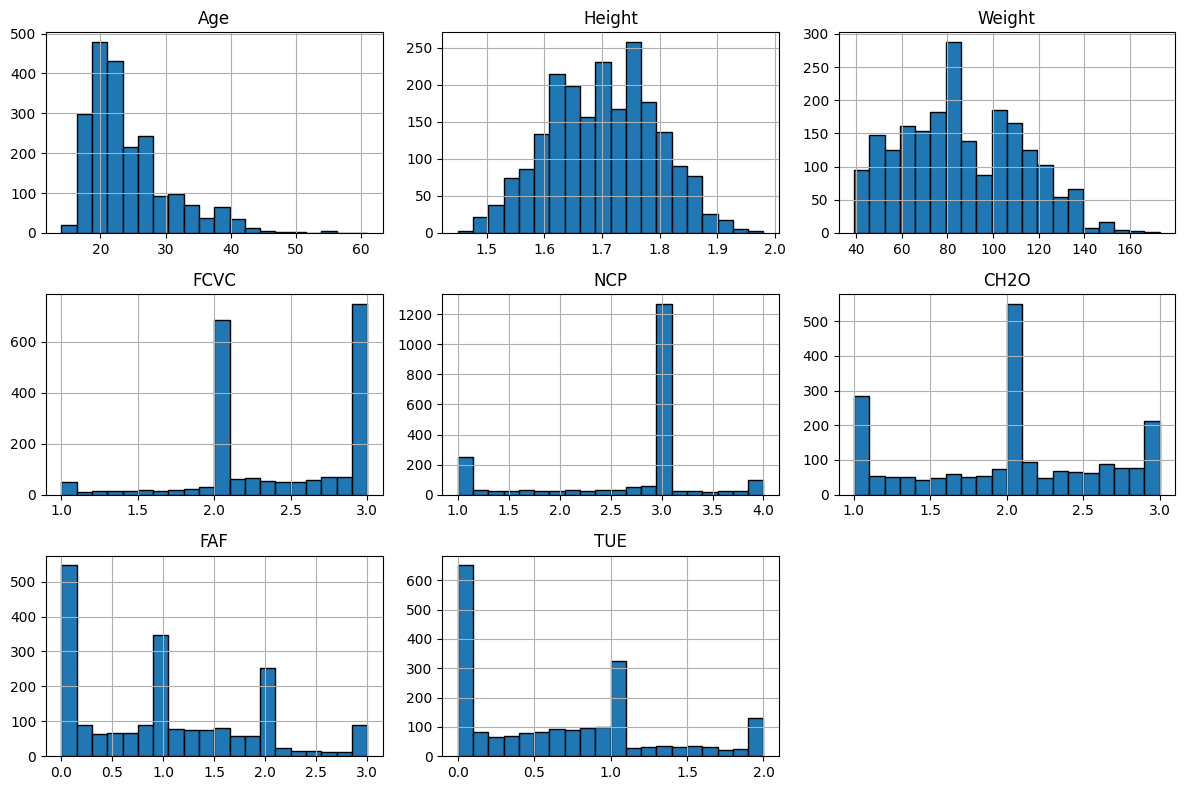

In [9]:
#Histogram for Numerical Features
data.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()


*data.hist* are used to show the distribution of numerical features.

In [11]:
# Apply Log Transformation to reduce outliers
data["NCP"] = np.log1p(data["NCP"])
data["Age"] = np.log1p(data["Age"])


np.log1p is a safer way to apply log

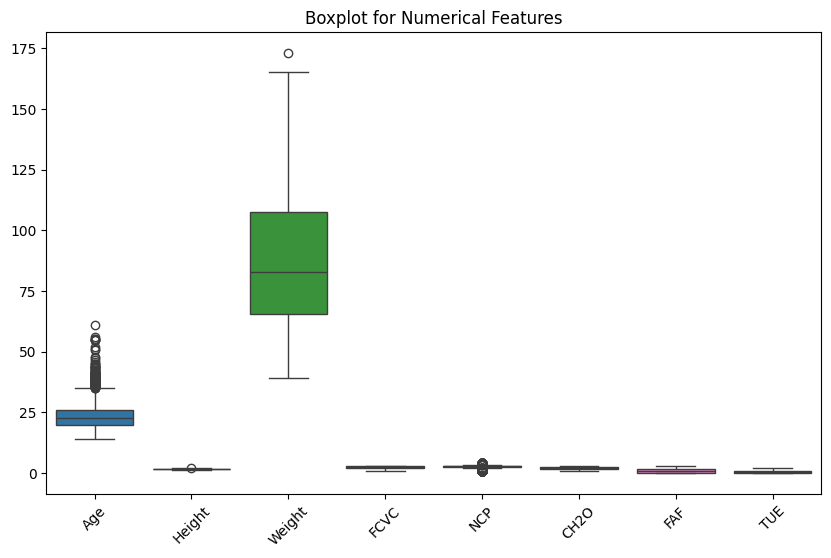

In [10]:
# Boxplot for Outlier Detection
plt.figure(figsize=(10, 6))
sns.boxplot(data=data.select_dtypes(include=['float64', 'int64']))
plt.title('Boxplot for Numerical Features')
plt.xticks(rotation=45)
plt.show()

sns.boxplot are used to show the  Boxplot for Outlier Detection.

<ipython-input-13-fd397e8a7188>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=data, palette='pastel')


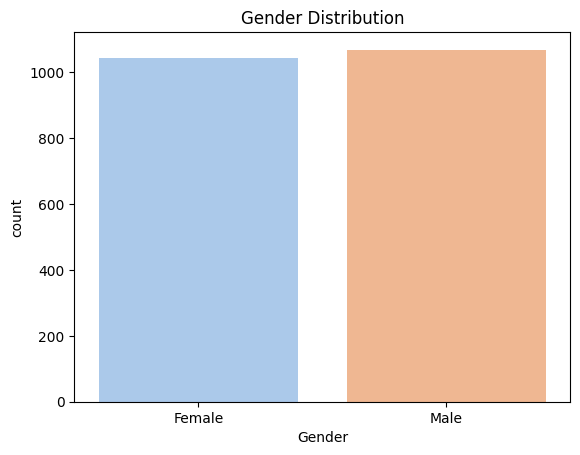

In [13]:
# Countplot for a Categorical Feature (Example: Gender)
sns.countplot(x='Gender', data=data, palette='pastel')
plt.title('Gender Distribution')
plt.show()

sns.countplot is used in this code:

Visualize Categorical Data: sns.countplot is used to visually represent the distribution of a categorical variable (like 'Gender') by displaying the count of each category as bars.
Understand Category Frequency: It helps in understanding the frequency or proportion of each category within the dataset, providing insights into the data's composition regarding the selected feature.

<ipython-input-14-ced26ff8a6fa>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Obesity', data=data, palette='Set2', order=data['Obesity'].value_counts().index)


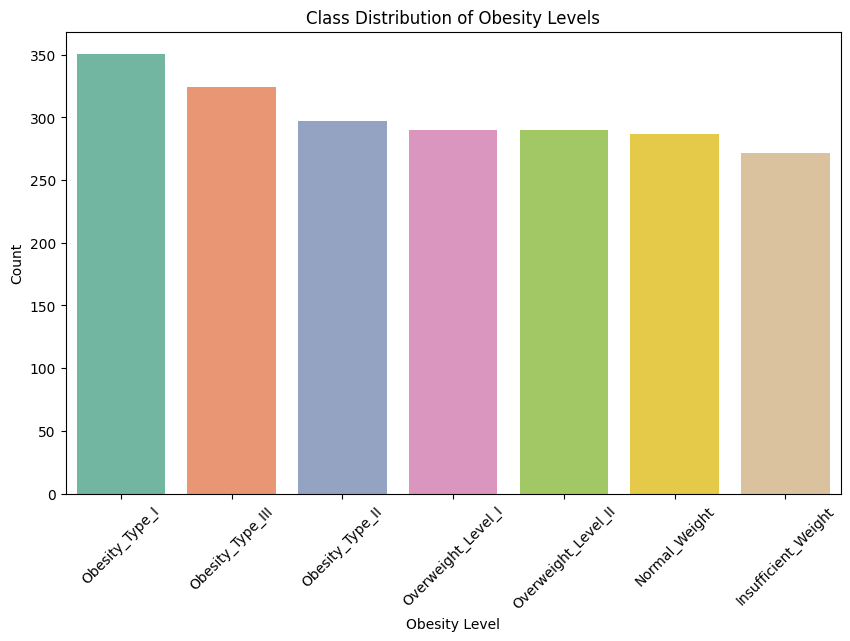

In [14]:
# Target Variable Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Obesity', data=data, palette='Set2', order=data['Obesity'].value_counts().index)
plt.title('Class Distribution of Obesity Levels')
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

 ***sns.countplot*** are used to show the frequency of different categories in categorical features, like gender or obesity levels from dataset

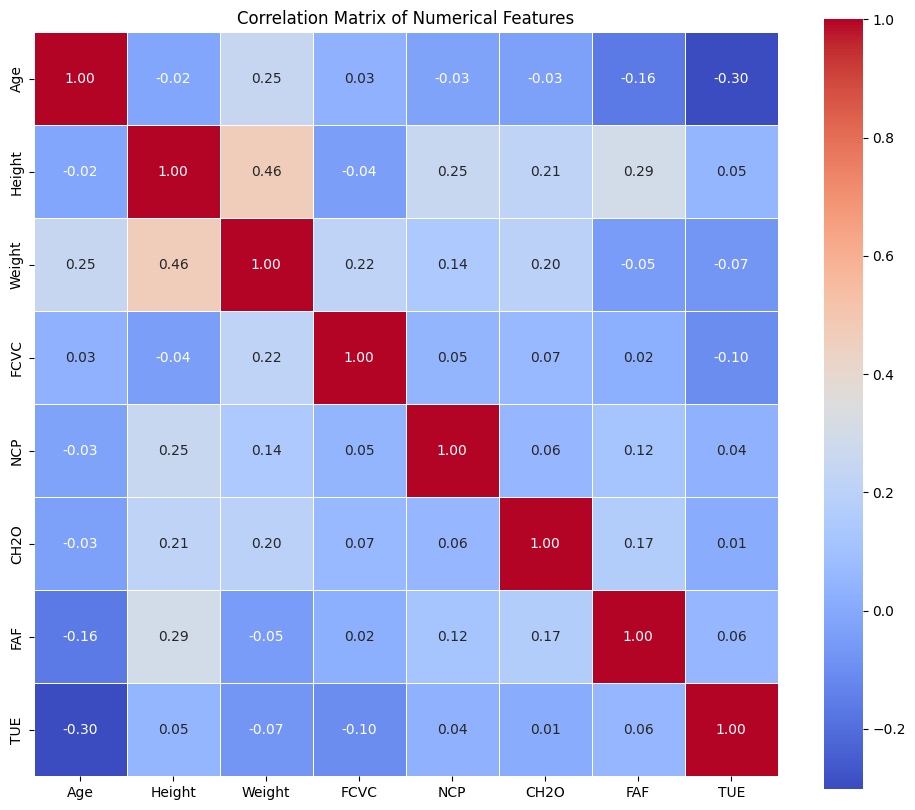

In [15]:
# Filter Numerical Features Only
numerical_data = data.select_dtypes(include=['int64', 'float64'])
# Correlation Heatmap for Numerical Features
plt.figure(figsize=(12, 10))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

*Its Show the heat map*

In [16]:
# Pairplot for Numerical Features
sns.pairplot(data, diag_kind='kde')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

*sns.heatmap* use to display the correlations between numerical features, helping you identify relationships between variables.

**Data Cleaning**

In [17]:
# Drop unnecessary columns (if any)
data = data.drop(columns=[col for col in data.columns if 'Unnamed' in col])

# Handle Missing Values (forward fill)
data.fillna(method='ffill', inplace=True)

#data.fillna(data.median(), inplace=True)  # For numerical
#data.fillna(data.mode().iloc[0], inplace=True)  # For categorical


# Label Encoding for Categorical Features
label_encoders = {}
for col in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Feature and Target Split
X = data.drop('Obesity', axis=1)
y = data['Obesity']

# Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Custom Train-Test Split Function
def train_test_split(X, y, test_size=0.2, random_state=None):
    """
    Split arrays or matrices into random train and test subsets.

    Parameters:
    X : array-like, shape (n_samples, n_features)
        The data to split.
    y : array-like, shape (n_samples,)
        The target variable to split.
    test_size : float, int, or None, optional (default=0.2)
        If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split.
        If int, represents the absolute number of test samples.
    random_state : int or None, optional (default=None)
        If int, random_state is the seed used by the random number generator; If None, the random number generator is the RandomState instance used by np.random.

    Returns:
    X_train, X_test, y_train, y_test : arrays
        The training and testing data and target variables.
    """
    if random_state is not None:
        np.random.seed(random_state)

    n_samples = X.shape[0]

    if isinstance(test_size, float):
        test_size = int(n_samples * test_size)

    indices = np.random.permutation(n_samples)
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test

# Perform train-test split using the custom function
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1689, 16)
X_test shape: (422, 16)
y_train shape: (1689,)
y_test shape: (422,)


<ipython-input-17-c91dbae83522>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


**Classification Task:**


*Logistic Regression from scratch*

In [18]:
import numpy as np

# Softmax Function
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Cross-Entropy Loss
def cross_entropy_loss(y_true, y_pred):
    m = y_true.shape[0]
    clipped_probs = np.clip(y_pred, 1e-10, 1.0)
    log_likelihood = -np.log(clipped_probs[range(m), y_true])
    return np.sum(log_likelihood) / m

# Gradient Computation
def compute_gradients(X, y_true, y_pred):
    m = X.shape[0]
    num_classes = y_pred.shape[1]
    y_one_hot = np.zeros((m, num_classes))
    y_one_hot[np.arange(m), y_true] = 1

    error = y_pred - y_one_hot
    dw = np.dot(X.T, error) / m
    db = np.sum(error, axis=0, keepdims=True) / m

    return dw, db

# Model Training
def train_model(X, y, learning_rate=0.1, num_iterations=1000):
    m, n = X.shape
    num_classes = np.unique(y).size

    weights = np.zeros((n, num_classes))
    bias = np.zeros((1, num_classes))

    for i in range(num_iterations):
        logits = np.dot(X, weights) + bias
        probs = softmax(logits)

        dw, db = compute_gradients(X, y, probs)
        weights -= learning_rate * dw
        bias -= learning_rate * db

        if i % 100 == 0:
            loss = cross_entropy_loss(y, probs)
            print(f"Iteration {i}, Loss: {loss:.4f}")

    return weights, bias

# Prediction
def predict(X, weights, bias):
    logits = np.dot(X, weights) + bias
    probs = softmax(logits)
    return np.argmax(probs, axis=1)

# Evaluation Metrics
def evaluate_model(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    precision = np.sum((y_pred == y_true) & (y_pred == 1)) / np.sum(y_pred == 1)
    recall = np.sum((y_pred == y_true) & (y_pred == 1)) / np.sum(y_true == 1)
    f1_score = 2 * (precision * recall) / (precision + recall)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1_score:.4f}")

# Assuming X_train, y_train, X_test, y_test are already defined and preprocessed
# Train Logistic Regression Model
weights, bias = train_model(X_train, y_train, learning_rate=0.1, num_iterations=1000)
y_pred_lr = predict(X_test, weights, bias)

# Evaluate Logistic Regression
print("\nLogistic Regression (Scratch) Evaluation:")
evaluate_model(y_test, y_pred_lr)

Iteration 0, Loss: 1.9459
Iteration 100, Loss: 1.0680
Iteration 200, Loss: 0.9468
Iteration 300, Loss: 0.8838
Iteration 400, Loss: 0.8406
Iteration 500, Loss: 0.8075
Iteration 600, Loss: 0.7805
Iteration 700, Loss: 0.7578
Iteration 800, Loss: 0.7382
Iteration 900, Loss: 0.7209

Logistic Regression (Scratch) Evaluation:
Accuracy: 0.7393
Precision: 0.6970
Recall: 0.3710
F1 Score: 0.4842


**Decision Tree**

In [19]:
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Evaluation
print("\nDecision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))



Decision Tree Accuracy: 0.8341232227488151
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        56
           1       0.85      0.63      0.72        62
           2       0.80      0.95      0.87        78
           3       0.96      0.95      0.96        58
           4       1.00      1.00      1.00        63
           5       0.71      0.62      0.67        56
           6       0.61      0.69      0.65        49

    accuracy                           0.83       422
   macro avg       0.83      0.82      0.82       422
weighted avg       0.84      0.83      0.83       422



In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create and train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8649289099526066
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        56
           1       0.77      0.74      0.75        62
           2       0.90      0.83      0.87        78
           3       0.90      0.98      0.94        58
           4       1.00      1.00      1.00        63
           5       0.78      0.77      0.77        56
           6       0.74      0.76      0.75        49

    accuracy                           0.86       422
   macro avg       0.86      0.86      0.86       422
weighted avg       0.86      0.86      0.86       422



**KNN Algorithm**

In [21]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Evaluation
print("\nKNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))



KNN Accuracy: 0.8222748815165877
              precision    recall  f1-score   support

           0       0.71      0.93      0.81        56
           1       0.67      0.42      0.51        62
           2       0.84      0.92      0.88        78
           3       0.90      0.98      0.94        58
           4       0.98      1.00      0.99        63
           5       0.87      0.70      0.77        56
           6       0.73      0.78      0.75        49

    accuracy                           0.82       422
   macro avg       0.81      0.82      0.81       422
weighted avg       0.82      0.82      0.81       422



**Hyperparameter Tuning for Decision Tree**

In [22]:

from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Hyperparameter tuning for Decision Tree
param_dist_dt = {
    'max_depth': [3, 5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_model = DecisionTreeClassifier(random_state=42)
rand_dt = RandomizedSearchCV(dt_model, param_dist_dt, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
rand_dt.fit(X_train, y_train)

# Best parameters for Decision Tree
print("\nBest Params for Decision Tree:", rand_dt.best_params_)
best_dt = rand_dt.best_estimator_




Best Params for Decision Tree: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}


**Hyperparameter Tuning for KNN Algorithm**

In [23]:

from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Hyperparameter tuning for KNN
param_dist_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40, 50, 60]
}

knn_model = KNeighborsClassifier()
rand_knn = RandomizedSearchCV(knn_model, param_dist_knn, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
rand_knn.fit(X_train, y_train)

# Best parameters for KNN
print("\nBest Params for KNN:", rand_knn.best_params_)
best_knn = rand_knn.best_estimator_




Best Params for KNN: {'weights': 'distance', 'n_neighbors': 3, 'leaf_size': 60, 'algorithm': 'ball_tree'}


Feature Selection for Decision Tree

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming df is already loaded as in your provided code
# Define features and target variable for obesity dataset
features = ['Gender', 'Age', 'Height', 'Weight', 'FCVC', 'MTRANS']  # Your features
X = data[features]
# Change 'obesity' to 'Obesity' (or 'NObeyesdad' if that's the actual target column name)
y = data['Obesity']  # Assuming 'Obesity' is your target variable for obesity dataset

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature selection using SelectKBest and ANOVA F-value
k = 5  # Select the top k features, you can adjust k as needed
selector = SelectKBest(score_func=f_classif, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get the selected feature names
selected_feature_indices = selector.get_support(indices=True)
selected_features = [features[i] for i in selected_feature_indices]

print("Selected Features:", selected_features)

Selected Features: ['Gender', 'Age', 'Height', 'Weight', 'FCVC']


Feature Selection for KNN ALgorithm

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming df is already loaded as in your provided code
# Define features and target variable for obesity dataset
features = ['Gender', 'Age', 'Height', 'Weight', 'FCVC', 'MTRANS']  # Your features
X = data[features]
y = data['Obesity']  # Assuming 'NObeyesdad' is your target variable for obesity dataset

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature selection using SelectKBest and ANOVA F-value
k = 5  # Select the top k features, you can adjust k as needed
selector = SelectKBest(score_func=f_classif, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get the selected feature names
selected_feature_indices = selector.get_support(indices=True)
selected_features = [features[i] for i in selected_feature_indices]

print("Selected Features:", selected_features)



Selected Features: ['Gender', 'Age', 'Height', 'Weight', 'FCVC']


**Final Model**

In [26]:
# --- Final Decision Tree Model ---
# Best hyperparameters from Decision Tree tuning
best_dt_params = {'max_depth': 20, 'min_samples_leaf': 3, 'min_samples_split': 5}

# Create and train the final Decision Tree model
final_dt_model = DecisionTreeClassifier(
    max_depth=best_dt_params['max_depth'],
    min_samples_split=best_dt_params['min_samples_split'],
    min_samples_leaf=best_dt_params['min_samples_leaf'],
    random_state=42
)
final_dt_model.fit(X_train_selected, y_train)

# Make predictions
y_pred_dt = final_dt_model.predict(X_test_selected)

# Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("\nFinal Decision Tree Accuracy:", accuracy_dt)
print("\nClassification Report for Decision Tree:\n", classification_report(y_test, y_pred_dt))
print("\nConfusion Matrix for Decision Tree:\n", confusion_matrix(y_test, y_pred_dt))

# --- Final KNN Model ---
# Best hyperparameters from KNN tuning
best_knn_params = {'n_neighbors': 7, 'weights': 'distance', 'algorithm': 'auto', 'leaf_size': 30}

# Create and train the final KNN model
final_knn_model = KNeighborsClassifier(
    n_neighbors=best_knn_params['n_neighbors'],
    weights=best_knn_params['weights'],
    algorithm=best_knn_params['algorithm'],
    leaf_size=best_knn_params['leaf_size']
)
final_knn_model.fit(X_train_selected, y_train)

# Make predictions
y_pred_knn = final_knn_model.predict(X_test_selected)

# Evaluate the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("\nFinal KNN Accuracy:", accuracy_knn)
print("\nClassification Report for KNN:\n", classification_report(y_test, y_pred_knn))
print("\nConfusion Matrix for KNN:\n", confusion_matrix(y_test, y_pred_knn))

# Compare and Select Best Model
models = {"Decision Tree": accuracy_dt, "KNN": accuracy_knn}
best_model = max(models, key=models.get)

# Print Final Results
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"KNN Accuracy: {accuracy_knn:.4f}")
print(f"Best Model: {best_model} with Accuracy: {models[best_model]:.4f}")


Final Decision Tree Accuracy: 0.9456264775413712

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        56
           1       0.98      0.87      0.92        62
           2       0.95      0.94      0.94        78
           3       0.95      0.95      0.95        58
           4       1.00      1.00      1.00        63
           5       0.90      0.93      0.91        56
           6       0.90      0.94      0.92        50

    accuracy                           0.95       423
   macro avg       0.94      0.95      0.94       423
weighted avg       0.95      0.95      0.95       423


Confusion Matrix for Decision Tree:
 [[56  0  0  0  0  0  0]
 [ 4 54  0  0  0  4  0]
 [ 0  0 73  3  0  0  2]
 [ 0  0  3 55  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  1  0  0  0 52  3]
 [ 0  0  1  0  0  2 47]]

Final KNN Accuracy: 0.8605200945626478

Classification Report for KNN:
               precision    rec

# **Regression Task**

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression

In [28]:
data = pd.read_csv('/content/drive/MyDrive/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [30]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


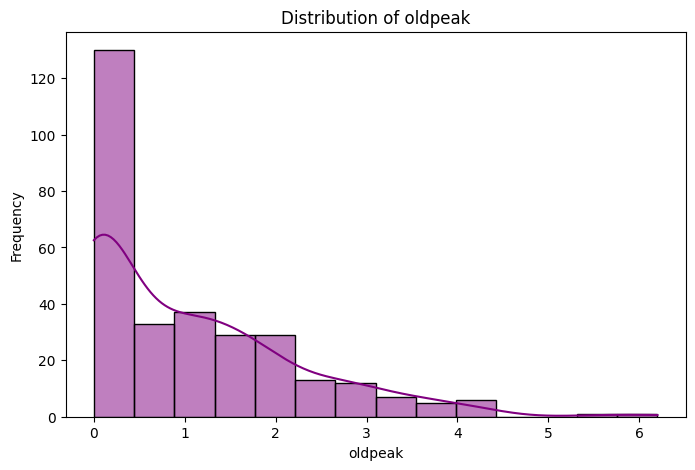

In [31]:
# Target Variable Distribution (For Regression)
plt.figure(figsize=(8, 5))
sns.histplot(data['oldpeak'], kde=True, color='purple')
plt.title('Distribution of oldpeak')
plt.xlabel('oldpeak')
plt.ylabel('Frequency')
plt.show()

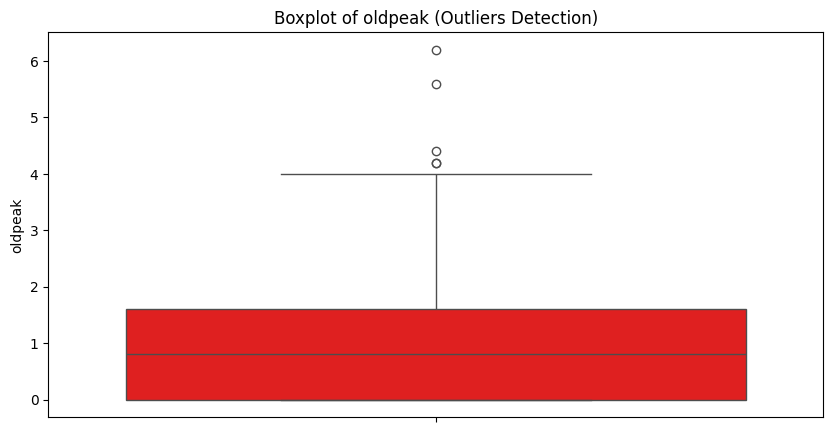

In [32]:
plt.figure(figsize=(10, 5))
sns.boxplot(y=data["oldpeak"], color='red')
plt.title("Boxplot of oldpeak (Outliers Detection)")
plt.show()

**Linerar Regression from Scratch**

In [33]:

class LinearRegressionScratch:
    def __init__(self, learning_rate=0.001, epochs=5000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.random.randn(n_features) * 0.01  # Small random initialization
        self.bias = 0

        for _ in range(self.epochs):
            y_pred = np.dot(X, self.weights) + self.bias

            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            # Check for NaN values in gradients
            if np.isnan(dw).any() or np.isnan(db):
                print("NaN values encountered in gradients. Stopping training.")
                break

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias



# Drop unnecessary columns (if any)
data = data.drop(columns=[col for col in data.columns if 'Unnamed' in col])

# Handle Missing Values (forward fill)
data.fillna(method='ffill', inplace=True)

# Label Encoding for Categorical Features
label_encoders = {}
for col in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Feature and Target Split for Regression
X = data.drop('oldpeak', axis=1)
y = data['oldpeak']

# Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform train-test split using the custom function
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Feature selection using SelectKBest and ANOVA F-value
selector = SelectKBest(score_func=f_regression, k=5)  # Select the top 5 features
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Train and evaluate Linear Regression from Scratch
lin_reg = LinearRegressionScratch(learning_rate=0.001, epochs=5000)
lin_reg.fit(X_train_selected, y_train)
y_pred_lr = lin_reg.predict(X_test_selected)

# Check for NaN values in predictions
if np.isnan(y_pred_lr).any():
    print("NaN values encountered in predictions.")

print("Linear Regression (Scratch) R² Score:", r2_score(y_test, y_pred_lr))

<ipython-input-33-641c6f7611f5>:36: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


Linear Regression (Scratch) R² Score: 0.3960118331513589


**Decision Tree for Regression**

In [37]:

# Decision Tree Regression
dt_reg = DecisionTreeRegressor(random_state=42, max_depth=2, min_samples_split=10, min_samples_leaf=5, ccp_alpha=0.3)
dt_reg.fit(X_train_selected, y_train)
y_pred_dt = dt_reg.predict(X_test_selected)
print("Decision Tree Regression R² Score:", r2_score(y_test, y_pred_dt))


Decision Tree Regression R² Score: 0.273096844562981


 **Random Forest for Regression:**

In [38]:

# Random Forest Regression with Reduced Complexity
rf_reg = RandomForestRegressor(n_estimators=5, random_state=42, max_depth=2, min_samples_split=10, min_samples_leaf=5)
rf_reg.fit(X_train_selected, y_train)
y_pred_rf = rf_reg.predict(X_test_selected)
print("Random Forest Regression R² Score:", r2_score(y_test, y_pred_rf))


Random Forest Regression R² Score: 0.4115100158687487


**Hyperparameter tuning for Decision Tree Regression**

In [39]:
# Hyperparameter Tuning for Decision Tree
param_dist_dt = {
    'max_depth': [1, 2, 3],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [5, 10],
    'ccp_alpha': [0.2, 0.3, 0.4]
}
rand_dt = RandomizedSearchCV(dt_reg, param_dist_dt, cv=5, scoring='r2', n_iter=10, random_state=42, n_jobs=-1)
rand_dt.fit(X_train_selected, y_train)
print("Best Params for Decision Tree:", rand_dt.best_params_)
print("Best R² Score (Decision Tree):", rand_dt.best_score_)


Best Params for Decision Tree: {'min_samples_split': 5, 'min_samples_leaf': 5, 'max_depth': 3, 'ccp_alpha': 0.2}
Best R² Score (Decision Tree): 0.23239907443268537


**Feature Selection**

In [40]:

# Feature selection using SelectKBest and ANOVA F-value
selector = SelectKBest(score_func=f_regression, k=2)  # Reduce the number of features to 2
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get the selected feature names
selected_feature_indices = selector.get_support(indices=True)
selected_features = [X.columns[i] for i in selected_feature_indices]
print("Selected Features:", selected_features)


Selected Features: ['slope', 'target']


In [43]:
# Train Best Models
best_dt = DecisionTreeRegressor(**rand_dt.best_params_, random_state=42)

# Define param_dist_rf and perform RandomizedSearchCV for RandomForestRegressor
param_dist_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rand_rf = RandomizedSearchCV(RandomForestRegressor(random_state=42),
                             param_dist_rf, n_iter=10, cv=5, scoring='r2',
                             random_state=42, n_jobs=-1)
rand_rf.fit(X_train_selected, y_train)

# Now you can access rand_rf.best_params_
best_rf = RandomForestRegressor(**rand_rf.best_params_, random_state=42)

best_dt.fit(X_train_selected, y_train)
best_rf.fit(X_train_selected, y_train)

# Make Predictions
y_pred_dt_best = best_dt.predict(X_test_selected)
y_pred_rf_best = best_rf.predict(X_test_selected)

# Evaluate Models
dt_r2 = r2_score(y_test, y_pred_dt_best)
rf_r2 = r2_score(y_test, y_pred_rf_best)

**Final Model**

In [44]:
# Compare and Select Best Model
models = {"Decision Tree": dt_r2, "Random Forest": rf_r2}
best_model = max(models, key=models.get)

# Print Final Results
print(f"Decision Tree R² Score: {dt_r2:.4f}")
print(f"Random Forest R² Score: {rf_r2:.4f}")
print(f"Best Model: {best_model} with R² Score: {models[best_model]:.4f}")

Decision Tree R² Score: 0.2731
Random Forest R² Score: 0.4370
Best Model: Random Forest with R² Score: 0.4370
